

# Basic Digital Imaging Notions For The Life Scientist

    Author : Yannick Krempp
    Cellular Imaging Facility
    25.02.2020


## 1) A digital image is just a table of numbers

A digital image is a table or a set of tables of numbers that reprenset pixels and their intensities.
To illustrate this concept, we can create a table of random numbers and display it as an image

Text(0.5, 1.0, 'A complex image of size (56, 256, 256, 3) \n (showing only frame 20)')

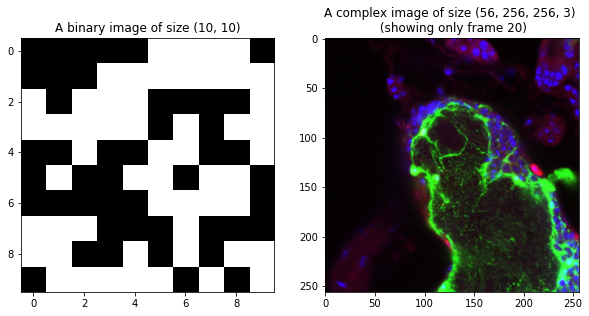

In [8]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import random

random.seed()
df = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
big_image = io.imread('first-instar-brain.tif') 

fig, ax = plt.subplots(figsize=(10,10), ncols=2)

ax[0].imshow(df, cmap='gray')
ax[0].set_title(f"A binary image of size {df.shape}")

ax[1].imshow(big_image[20,:,:,:], cmap='gray')
ax[1].set_title(f"A complex image of size {big_image.shape} \n (showing only frame 20)")

#### We can see some of their values :

In [48]:
print('Binary image: \n\n', df.head(100),'\n')
print('Big image: \n\n', big_image[20,:,:,:])

Binary image: 

    0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  1  1  1  1  0
1  0  0  0  1  1  1  1  1  1  1
2  1  0  1  1  1  0  0  0  0  1
3  1  1  1  1  1  0  1  0  1  1
4  0  0  1  0  0  1  1  0  0  1
5  0  1  0  0  1  1  0  1  1  0
6  0  0  0  0  0  1  1  1  1  0
7  1  1  1  0  0  0  1  0  0  0
8  1  1  0  0  1  0  1  0  1  1
9  0  1  1  1  1  1  0  1  0  1 

Big image: 

 [[[  4   1   2]
  [  4   1   2]
  [  5   1   2]
  ...
  [ 58  68  36]
  [ 60  68  35]
  [ 45  41  26]]

 [[  4   1   2]
  [  4   1   2]
  [  6   1   3]
  ...
  [ 60  65  33]
  [ 62  69  32]
  [ 54  42  27]]

 [[  4   1   2]
  [  4   1   2]
  [  5   1   2]
  ...
  [ 67  54  32]
  [ 61  56  30]
  [ 57  29  25]]

 ...

 [[  8   0   7]
  [ 10   1   6]
  [ 11   1   9]
  ...
  [ 60 144 138]
  [ 62 154 184]
  [ 71 169 164]]

 [[  6   0   5]
  [  8   0   5]
  [ 12   0   6]
  ...
  [ 59 105 176]
  [ 58 138 241]
  [ 72 179 218]]

 [[ 10   2   7]
  [  9   2   6]
  [ 12   2   6]
  ...
  [ 58 103 183]
  [ 68 128 224]
  [

## 2) Bit Depth : pixels have values depending on bit depth

Here are several images with different bitdepth

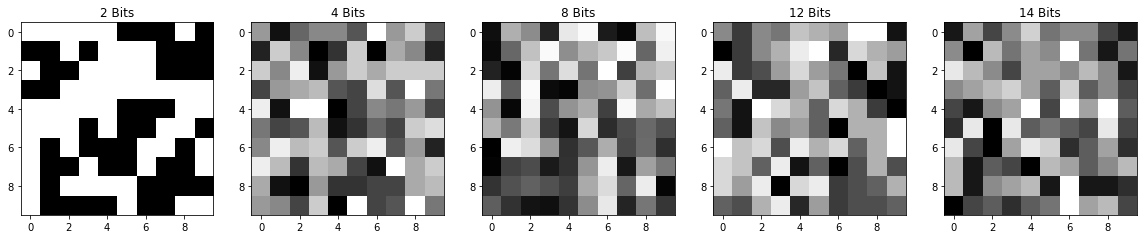

In [10]:
df_2bit = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
df_4bit = pd.DataFrame(np.random.randint(0,16,size=(10, 10)))
df_8bit = pd.DataFrame(np.random.randint(0,256,size=(10, 10)))
df_12bit = pd.DataFrame(np.random.randint(0,2^12,size=(10, 10)))
df_14bit = pd.DataFrame(np.random.randint(0,2^14,size=(10, 10)))

fig = plt.figure(figsize=(20,20))

fig.add_subplot(1,5,1)
plt.title('2 Bits')
plt.imshow(df_2bit, cmap='gray')

fig.add_subplot(1,5,2)
plt.title('4 Bits')
plt.imshow(df_4bit,cmap='gray')

fig.add_subplot(1,5,3)
plt.title('8 Bits')
plt.imshow(df_8bit,cmap='gray')

fig.add_subplot(1,5,4)
plt.title('12 Bits')
plt.imshow(df_12bit,cmap='gray')

fig.add_subplot(1,5,5)
plt.title('14 Bits')
plt.imshow(df_14bit,cmap='gray')



## 3) A 2D digital image size depends only on its pixel dimensions

Commonly, people refer to image size as how large they see the image displayed. An image's **digital size** (or *dimension*) is only dependant of its size **in pixels**.

The way a digital image is diplayed, either in **color** or **in physical size** depends on the medium it is represented on and the user's choice.

### 3.1) Physical size

Here's the same image displayed at two diffrent physical sizes:


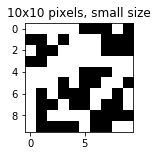

In [11]:
fig = plt.figure(figsize=(2,2))
fig.add_subplot(1,1,1)
plt.title('10x10 pixels, small size')
plt.imshow(df_2bit, cmap='gray')

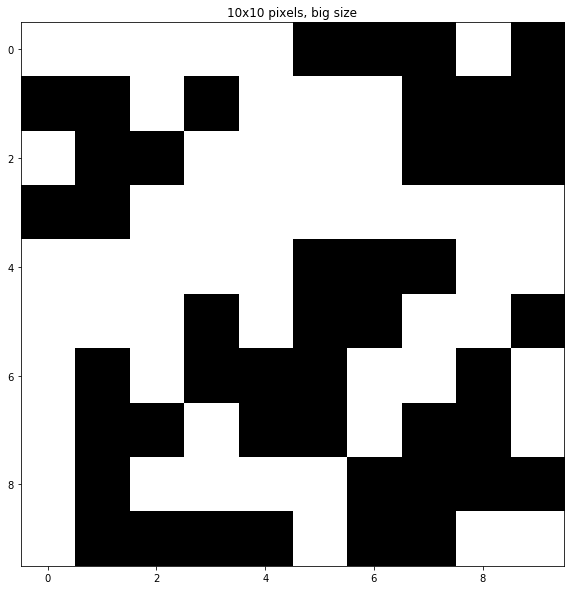

In [12]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
plt.title('10x10 pixels, big size')
plt.imshow(df_2bit, cmap='gray')

### 3.2) Interpolation

If you represent **each pixel of the image with a single pixel on your screen**, you are viewing the image in its real dimension, or often called as **100% magnification.**

In every other cases you are actually doing what is called **interpolation** to recreate the missing pixels if you are upscaling the image, or finding the most reprensetative value for a group of pixels if you are downscaling the image.

**Here are some examples with our 10x10 pixels image:**

Text(0.5, 1.0, 'Bicubic')

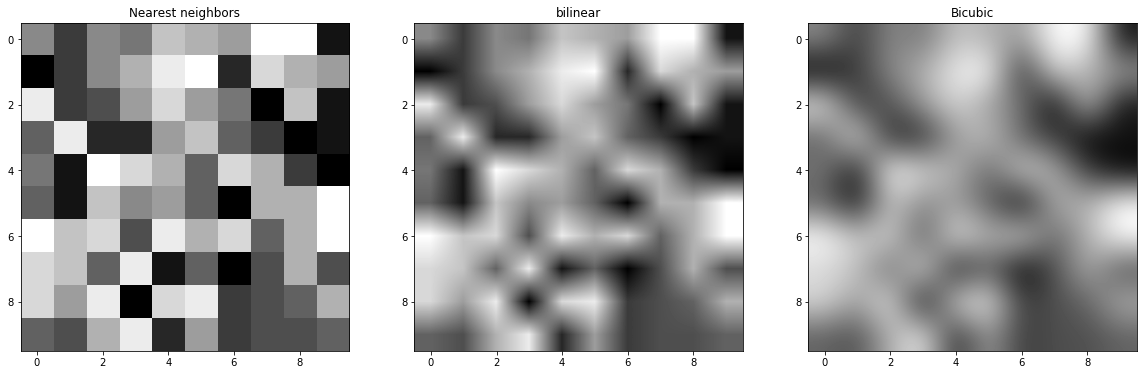

In [13]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

map1 = ax[0].imshow(df_12bit.astype(float), cmap='gray', interpolation='nearest')
ax[0].set_title('Nearest neighbors')

map2 = ax[1].imshow(df_12bit.astype(float),cmap='gray', interpolation='bilinear')
ax[1].set_title('bilinear')

map3 = ax[2].imshow(df_12bit.astype(float),cmap='gray', interpolation='bicubic')
ax[2].set_title('Bicubic')


### 3.3) DPI

**DPI** stand for **Dots Per Inch** and is related to the number of pixels per inch. 

**DPI is inherently related to the medium supporting the image**: a computer screen has a certain number of physical pixels that cannot change. If you count the number of pixels of this screen along one inch, you can measure its DPI.

Other media like paper do not have inherent DPI limitations, and you can decide how many DPI you will use when printing an image.

**Here's an example of how the same image would print with different print settings**

#### A figure's size when set to be printed on a 50 dpi paper

- The **image data** is 256x256 pixels
- The **image** is drawn on a **canvas** of 500x500 pixels of the **same size as the data**
- The **figure**'s size is then **scaled** to make sure you have **50** pixels per inch on the paper **when printed at 50 DPI**
- The **figure**'s **resolution** is 50 DPI.

Text(0.5, 1.0, '256x256 image resized for printing at at 50 dpi')

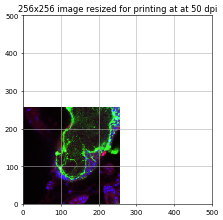

In [60]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=50)

ax.imshow(big_image[20,:,:,:])
ax.set_xlim(0,500)
ax.set_ylim(0,500)
ax.grid()
ax.set_title('256x256 image resized for printing at at 50 dpi')

#### The same figure's size when set to be printed on a 150 dpi paper.

- The **image data** is 256x256 pixels
- The **image** is drawn on a **canvas** of 500x500 pixels of the **same size as the data**
- The **figure**'s size is then **scaled** to make sure you have **150** pixels per inch on the paper **when printed at 150 DPI**
- The **figure**'s **resolution** is 150 DPI.

Text(0.5, 1.0, '256x256 image resized for printing at 150 dpi')

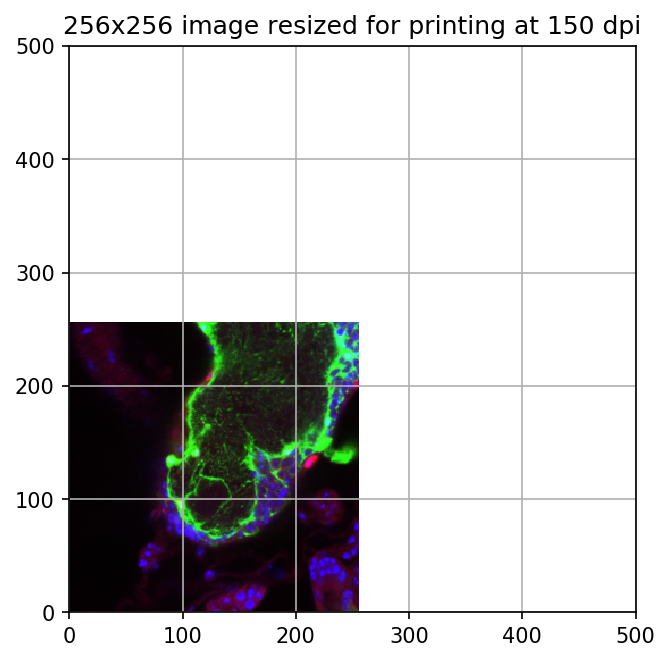

In [59]:
fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)

big_image_slice = big_image[20,:,:,:]


#from skimage.transform import rescale, resize, downscale_local_mean
#image_resized = resize(big_image_slice, [500,500,3], anti_aliasing=False)

ax2.imshow(big_image[20,:,:,:])
ax2.set_xlim(0,500)
ax2.set_ylim(0,500)
ax2.grid()
ax2.set_title('256x256 image resized for printing at 150 dpi')

#### Both pictures will appear as having the same physical size when printed respectively on 50 DPI and  150 DPI canvas, but printing an image scaled for 50 DPI on a 150 DPI canvas will have it appear 3 times smaller.

Text(0.5, 1.0, 'Simluation of \n a 50 DPI image printed on a 150 DPI canvas')

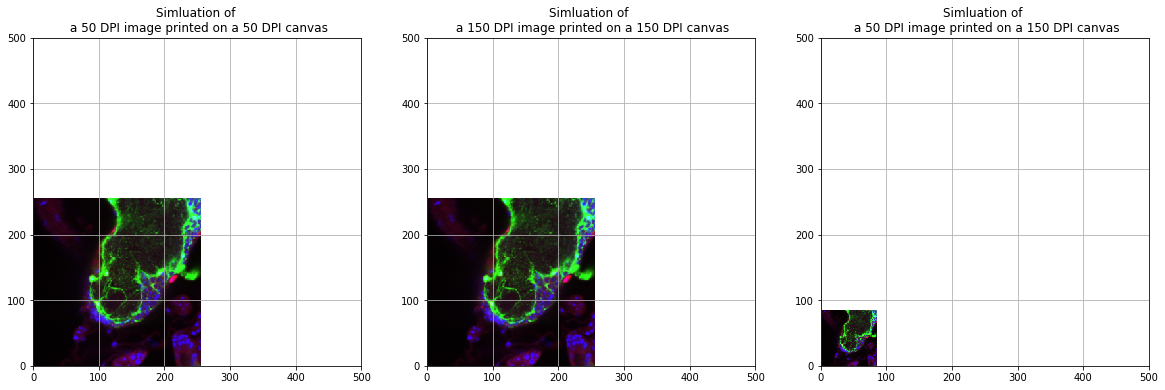

In [57]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

ax[0].imshow(big_image[20,:,:,:])
ax[0].set_xlim(0,500)
ax[0].set_ylim(0,500)
ax[0].grid()
ax[0].set_title('Simluation of \n a 50 DPI image printed on a 50 DPI canvas')

ax[1].imshow(big_image[20,:,:,:])
ax[1].set_xlim(0,500)
ax[1].set_ylim(0,500)
ax[1].grid()
ax[1].set_title('Simluation of \n a 150 DPI image printed on a 150 DPI canvas')


from skimage.transform import resize
image_resized = resize(big_image[20,:,:,:], [256//3,256//3,3], anti_aliasing=False)

ax[2].imshow(image_resized)
ax[2].set_xlim(0,500)
ax[2].set_ylim(0,500)
ax[2].grid()
ax[2].set_title('Simluation of \n a 50 DPI image printed on a 150 DPI canvas')

## 4) Colors in a digital image depends only on the colormap used to display it

Same image, different colormaps

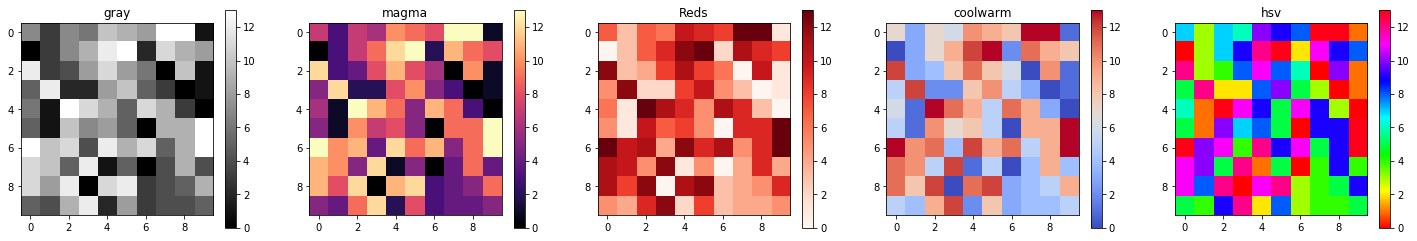

In [14]:
fig, ax = plt.subplots(figsize=(25, 4), ncols=5)

map1 = ax[0].imshow(df_12bit.astype(float), cmap='gray')
ax[0].set_title('gray')
plt.colorbar(map1, ax=ax[0])

map2 = ax[1].imshow(df_12bit.astype(float),cmap='magma')
ax[1].set_title('magma')
fig.colorbar(map2,ax=ax[1])

map3 = ax[2].imshow(df_12bit.astype(float),cmap='Reds')
ax[2].set_title('Reds')
fig.colorbar(map3, ax=ax[2])

map4 = ax[3].imshow(df_12bit.astype(float),cmap='coolwarm')
ax[3].set_title('coolwarm')
fig.colorbar(map4, ax=ax[3])

map5 = ax[4].imshow(df_12bit.astype(float),cmap='hsv')
ax[4].set_title('hsv')
fig.colorbar(map5, ax=ax[4])
